In [1]:
import sys
sys.path

['/Users/neulha/code/atom/Xpia/Paper',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/neulha/Library/Python/3.7/lib/python/site-packages',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/neulha/.ipython']

In [2]:
# python 3.7

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.pyplot import plot
from sklearn.preprocessing import MinMaxScaler
import datetime

In [3]:
!ls dataset/smart-meters-in-london/

Acorn Descriptions v2.csv   halfhourly_dataset.zip
acorn_details.csv           hhblock_dataset
daily_dataset               hhblock_dataset.zip
daily_dataset.csv           informations_households.csv
daily_dataset.csv.gz        uk_bank_holidays.csv
daily_dataset.zip           weather_daily_darksky.csv
halfhourly_dataset          weather_hourly_darksky.csv


In [4]:
import os
print(os.path)

<module 'posixpath' from '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/posixpath.py'>


In [5]:
import os
for dirname, _, filenames in os.walk('dataset/smart-meters-in-london/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset/smart-meters-in-london/Acorn Descriptions v2.csv
dataset/smart-meters-in-london/hhblock_dataset.zip
dataset/smart-meters-in-london/halfhourly_dataset.zip
dataset/smart-meters-in-london/acorn_details.csv
dataset/smart-meters-in-london/uk_bank_holidays.csv
dataset/smart-meters-in-london/weather_daily_darksky.csv
dataset/smart-meters-in-london/informations_households.csv
dataset/smart-meters-in-london/daily_dataset.zip
dataset/smart-meters-in-london/daily_dataset.csv.gz
dataset/smart-meters-in-london/weather_hourly_darksky.csv
dataset/smart-meters-in-london/halfhourly_dataset/halfhourly_dataset/block_71.csv
dataset/smart-meters-in-london/halfhourly_dataset/halfhourly_dataset/block_65.csv
dataset/smart-meters-in-london/halfhourly_dataset/halfhourly_dataset/block_59.csv
dataset/smart-meters-in-london/halfhourly_dataset/halfhourly_dataset/block_58.csv
dataset/smart-meters-in-london/halfhourly_dataset/halfhourly_dataset/block_64.csv
dataset/smart-meters-in-london/halfhourly_dataset/ha

In [6]:
block= 'block_58'
original_data = pd.read_csv('dataset/smart-meters-in-london/daily_dataset/daily_dataset/{}.csv'.format(block))
original_data.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,30937.000000,30937.000000,30937.000000,30937.000000,30858.000000,30937.000000,30937.000000
mean,0.155948,0.212452,0.873458,47.840159,0.175351,10.170189,0.063817
std,0.096738,0.122306,0.605377,2.513634,0.128481,5.878187,0.050756
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.083000,0.118021,0.393000,48.000000,0.072106,5.644000,0.027000
50%,0.134500,0.193500,0.761000,48.000000,0.148121,9.273000,0.055000
75%,0.208500,0.283896,1.217000,48.000000,0.244847,13.605000,0.086000
max,1.353000,1.531771,5.903000,48.000000,1.397785,73.525000,1.040000


In [7]:
max_data = original_data.loc[original_data.groupby('LCLid').pipe(lambda group: group.energy_max.idxmax(skipna=True))][['LCLid','day','energy_max']]
min_data = original_data.loc[original_data.groupby('LCLid').pipe(lambda group: group.energy_max.idxmin(skipna=True))][['LCLid','day','energy_min']]
# original_data.describe()

data = original_data.groupby('LCLid').agg({'energy_median': ['mean'], 'energy_mean': ['mean'], 'energy_sum': ['sum']})
data = data.merge(max_data, left_on='LCLid', right_on='LCLid',suffixes=('_left', '_max'))
data = data.merge(min_data, left_on='LCLid', right_on='LCLid',suffixes=('_max', '_min'))
data['day_max'] = pd.to_datetime(data['day_max']).dt.dayofweek
data['day_min'] = pd.to_datetime(data['day_min']).dt.dayofweek

# data = pd.concat([data,pd.get_dummies(data['day_min'], prefix='day_min')],axis=1).drop(columns=['day_min'])
# data = pd.concat([data,pd.get_dummies(data['day_max'], prefix='day_max')],axis=1).drop(columns=['day_max'])
data['min_max_ratio'] = data.pipe(lambda group: group.energy_min/ group.energy_max)
# print(original_data[(original_data['LCLid']=='MAC000094')])


data.head()

/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,LCLid,"(energy_median, mean)","(energy_mean, mean)","(energy_sum, sum)",day_max,energy_max,day_min,energy_min,min_max_ratio
0,MAC000094,0.178231,0.208458,8067.054,5,1.997,5,0.084,0.042063
1,MAC000097,0.282496,0.407007,15810.307,5,4.889,4,0.118,0.024136
2,MAC000151,0.062829,0.078041,3100.452,1,1.116,4,0.026,0.023297
3,MAC000157,0.213507,0.240548,9546.545,6,2.004,1,0.078,0.038922
4,MAC000352,0.152686,0.220642,7628.425,6,2.068,4,0.049,0.023694


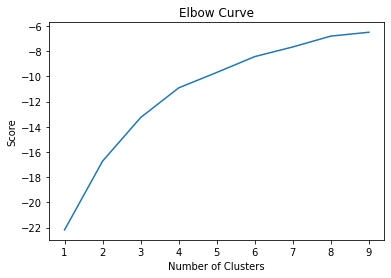

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(data.drop(columns=['LCLid']))

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.44899114 0.52986861 0.39310686 0.25       0.36340309 0.51190476
  0.20131741 0.34635724]
 [0.3756035  0.40589048 0.33723384 0.89814815 0.26362022 0.61111111
  0.15369837 0.29721955]
 [0.13120695 0.13979633 0.1013531  0.44444444 0.1198842  0.48611111
  0.08693564 0.26891385]
 [0.71559959 0.82917252 0.69282468 0.83333333 0.63459009 0.75
  0.45389049 0.45559102]]


In [10]:
clustered_data = pd.concat([data,pd.DataFrame(kmeans.predict(X))],axis=1).sort_values(by=[0])
clustered_data = clustered_data.rename(columns={0: 'Cluster'})
clustered_data.head()

,LCLid,"(energy_median, mean)","(energy_mean, mean)","(energy_sum, sum)",day_max,energy_max,day_min,energy_min,min_max_ratio,Cluster
22,MAC002032,0.206918,0.306908,9192.046999,3,3.568,5,0.016,0.004484,0
46,MAC005281,0.194718,0.259279,5110.883999,2,4.313,1,0.074,0.017157,0
45,MAC005207,0.193598,0.253251,9188.309000,0,2.223,4,0.057,0.025641,0
25,MAC002074,0.145291,0.243139,7259.855002,2,2.324,2,0.072,0.030981,0
26,MAC002245,0.078990,0.141413,4585.739999,2,3.956,4,0.119,0.030081,0


Processing MAC002032, Cluster: 0
[WARNING] LCLid: MAC005281 has no data between dates: 2014-02-01-> 2014-02-07
Processing MAC005207, Cluster: 0
Processing MAC002074, Cluster: 0
Processing MAC002245, Cluster: 0
Processing MAC000447, Cluster: 0
Processing MAC000524, Cluster: 0
Processing MAC003870, Cluster: 0
Processing MAC001857, Cluster: 0
Processing MAC003729, Cluster: 0
Processing MAC003734, Cluster: 0
Processing MAC003810, Cluster: 0
Processing MAC001636, Cluster: 0
Processing MAC003735, Cluster: 0
Processing MAC002311, Cluster: 0
Processing MAC000094, Cluster: 1
Processing MAC003828, Cluster: 1
Processing MAC003831, Cluster: 1
Processing MAC003868, Cluster: 1
Processing MAC004049, Cluster: 1
Processing MAC004138, Cluster: 1
Processing MAC005533, Cluster: 1
Processing MAC003819, Cluster: 1
Processing MAC002071, Cluster: 1
Processing MAC005543, Cluster: 1
Processing MAC001881, Cluster: 1
Processing MAC001830, Cluster: 1
Processing MAC000157, Cluster: 1
Processing MAC001792, Cluster: 

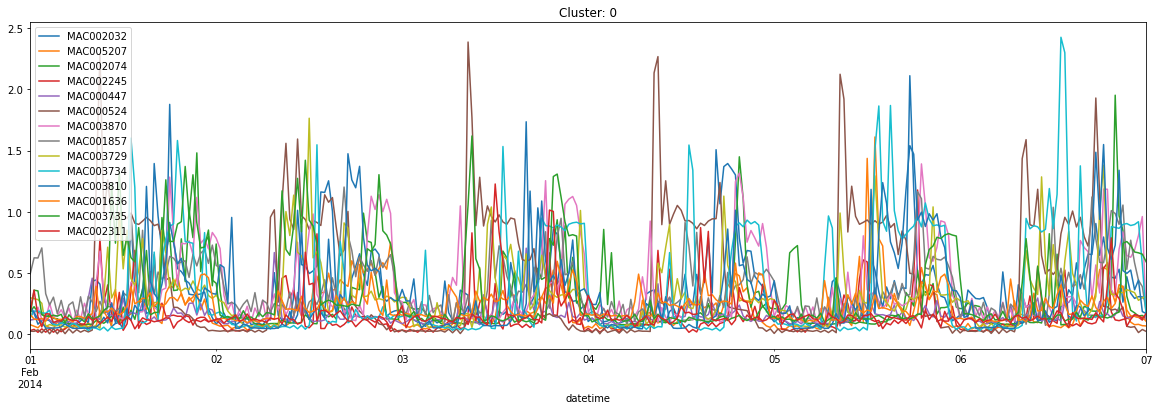

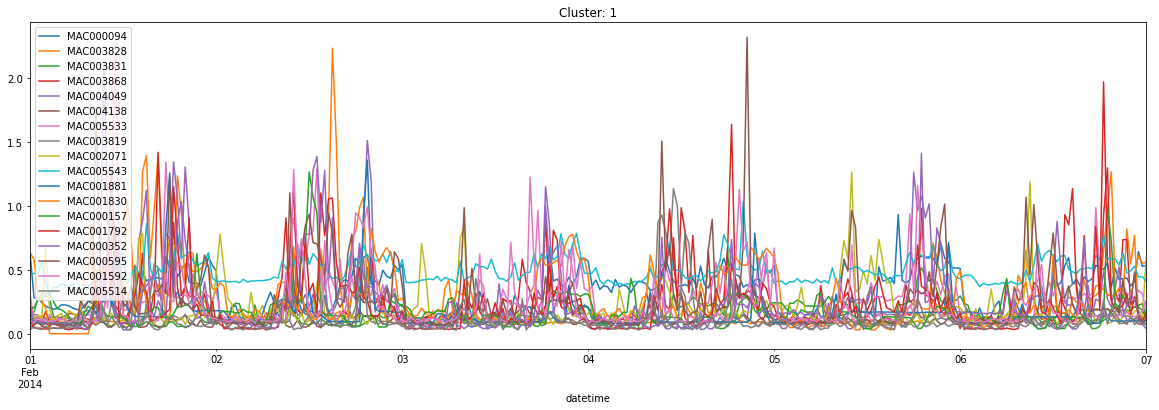

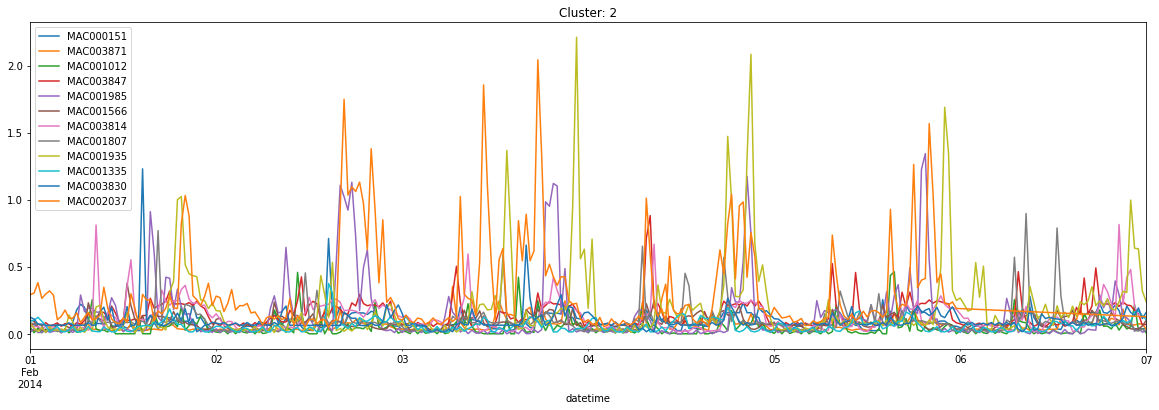

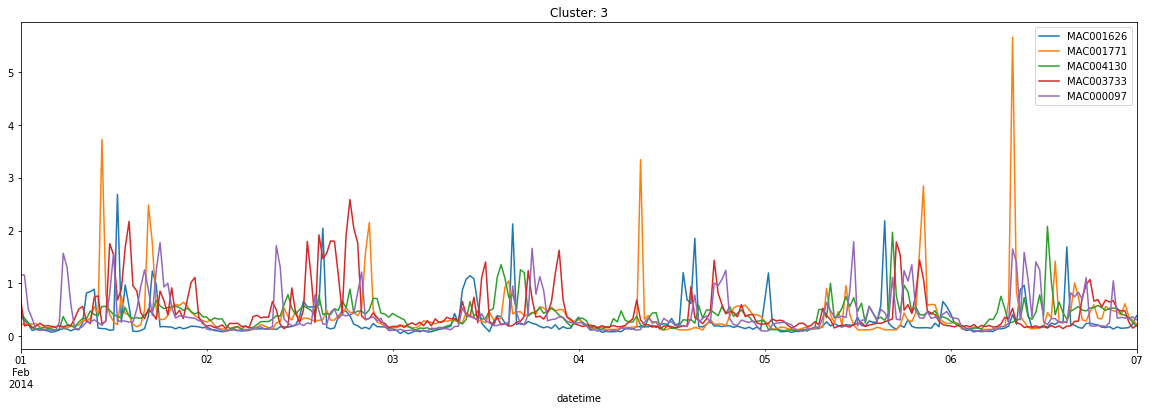

In [11]:
hourly_data = pd.read_csv('dataset/smart-meters-in-london/hhblock_dataset/hhblock_dataset/{}.csv'.format(block))

def create_plot(LCLid, start_date=None, end_date=None, ax=None, title=None):
    plot_data = hourly_data[(hourly_data['LCLid']==LCLid)].set_index('day').drop(columns=['LCLid'])
    plot_data = plot_data.stack().reset_index().rename(columns={0: LCLid,'level_1': 'time','day':'date'})
    plot_data['time'] = plot_data['time'].apply(lambda x: x.replace('hh_',''))
    plot_data['datetime'] = plot_data[['date','time']].apply(lambda x: pd.to_datetime(x['date'])+datetime.timedelta(minutes=int(x['time'])*30),axis=1)
    plot_data = plot_data.drop(columns=['date','time'])
    
    if start_date:
        plot_data = plot_data[(plot_data['datetime'] >= pd.to_datetime(start_date))] 
    if end_date:
        plot_data = plot_data[(plot_data['datetime'] <= pd.to_datetime(end_date))]  
        
    if len(plot_data.index>0):
        plot_data = plot_data.set_index('datetime')
        plot = plot_data.plot(ax=ax, title=title, figsize = (20,6))
        print("Processing {LCLid}, {title}".format(**{'LCLid':LCLid, 'title':title}))
        return plot
    
    print("[WARNING] LCLid: {LCLid} has no data between dates: {start_date}-> {end_date}".format(**{'LCLid': LCLid, 'start_date': start_date, 'end_date': end_date}))
    return None
    

# hourly_data.head()
ax = None
cluster = 0
start_date='2014-02-01'
end_date='2014-02-07'
title = "Cluster: {}".format(str(cluster))
for index, consumer_row in clustered_data[['LCLid','Cluster']].iterrows():
    plot_new_cluster = cluster != consumer_row['Cluster']
    consumer_id, cluster = consumer_row['LCLid'], consumer_row['Cluster']
    aux = create_plot(consumer_id,start_date=start_date,end_date=end_date,ax=ax,title=title)
    if aux:
        ax = aux
    if plot_new_cluster:
        ax = None
        title = "Cluster: {}".format(str(cluster))